In [2]:
%load_ext autoreload
%autoreload 2

import time

import matplotlib.pyplot as plt

from algorithm_analysis import algorithms
from algorithm_analysis.benchmark import BROKEN_COMPONENTS
from algorithm_analysis.plotting import plot_episode_length_over_time_tabular, plot_episode_reward_over_time_tabular, scatter_episode_length_over_time_tabular, scatter_episode_reward_over_time_tabular
from envs.broken_components import BrokenComponentsEnv

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
t0 = time.monotonic()
components_list = BROKEN_COMPONENTS[4]
print(f'Time until {len(components_list)} components are generated: {time.monotonic()-t0}')
env = BrokenComponentsEnv(components_list, reward_modus='raw')
# env = gym.make('Taxi-v3')
print(f'Time until env is ready: {time.monotonic()-t0}')


Time until 11 components are generated: 0.0002770349965430796
Time until env is ready: 0.16584129398688674


In [4]:
discount_rates = [0.9, 0.8, 0.5]
learning_rates = [0.01, 0.1, 0.5]
trace_decays = [0.9, 0.0]
num_plots = 2
total_runs = len(discount_rates) * len(learning_rates)
episodes = 300


In [ ]:
t0 = time.monotonic()
for i, discount_rate in enumerate(discount_rates):
    for j, learning_rate in enumerate(learning_rates):
        for k, trace_decay in enumerate(trace_decays):
            fig, axs = plt.subplots(1, num_plots, figsize=(12, 5), constrained_layout=True)
            metric = algorithms.run_single_estimator('qlearning', env, env.observation_space.n, env.action_space.n, episodes=episodes,
                                   learning_rate=learning_rate, trace_decay=trace_decay, discount_rate=discount_rate)
            #plot_episode_length_over_time_tabular(axs[0], metric, smoothing_window=5)
            #plot_episode_reward_over_time_tabular(axs[1], metric, smoothing_window=5)
            scatter_episode_length_over_time_tabular(axs[0], metric)
            scatter_episode_reward_over_time_tabular(axs[1], metric)
            
            plt.savefig(f'tabularplots/qlearning-dr={discount_rate}-lr={learning_rate}-tr={trace_decay}.png', dpi=300, bbox_inches='tight')
            plt.show()


print(f'Time until all plots are ready: {time.monotonic()-t0}')

Run qlearning with 2048 states and 11 actions.


Run qlearning with 32768 states and 15 actions.

Run qlearning with 32768 states and 15 actions.

Run qlearning with 32768 states and 15 actions.

Run qlearning with 32768 states and 15 actions.

Time until plots are ready: 4560.950469487987


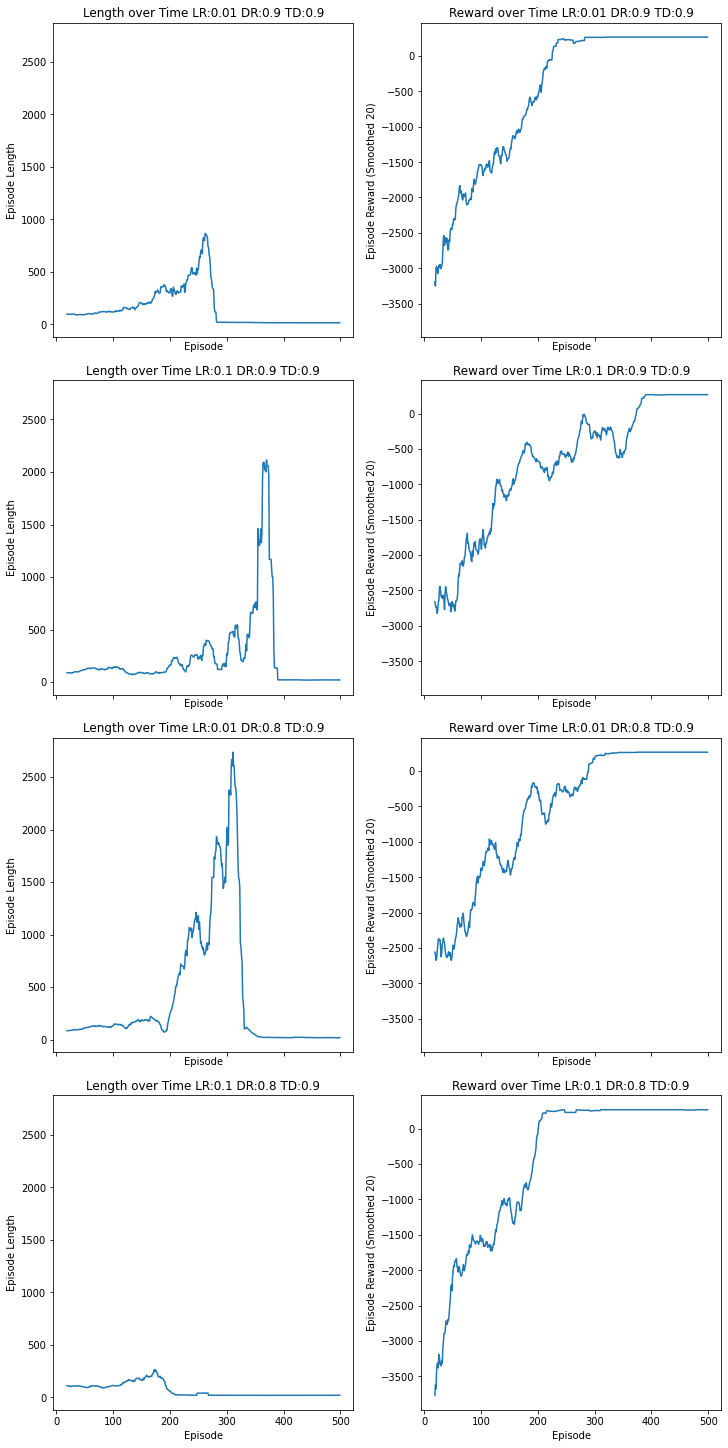

In [9]:
t0 = time.monotonic()
fig, axs = plt.subplots(total_runs, num_plots, figsize=(10, 5*total_runs), constrained_layout=True, sharex=True, sharey='col')
for i, discount_rate in enumerate(discount_rates):
    for j, learning_rate in enumerate(learning_rates):
        metric = algorithms.run_double_estimator('qlearning', env, env.observation_space.n, env.action_space.n, episodes=episodes,
                               learning_rate=learning_rate, discount_rate=discount_rate)
        ax_row = i * len(learning_rates) + j
        plot_episode_length_over_time_tabular(axs[ax_row, 0], metric, smoothing_window=20)
        plot_episode_reward_over_time_tabular(axs[ax_row, 1], metric, smoothing_window=20)
        

print(f'Time until plots are ready: {time.monotonic()-t0}')
plt.show()

Run sarsa with 32768 states and 15 actions.

Run sarsa with 32768 states and 15 actions.

Run sarsa with 32768 states and 15 actions.

Run sarsa with 32768 states and 15 actions.

Time until plots are ready: 1285.3222379050276


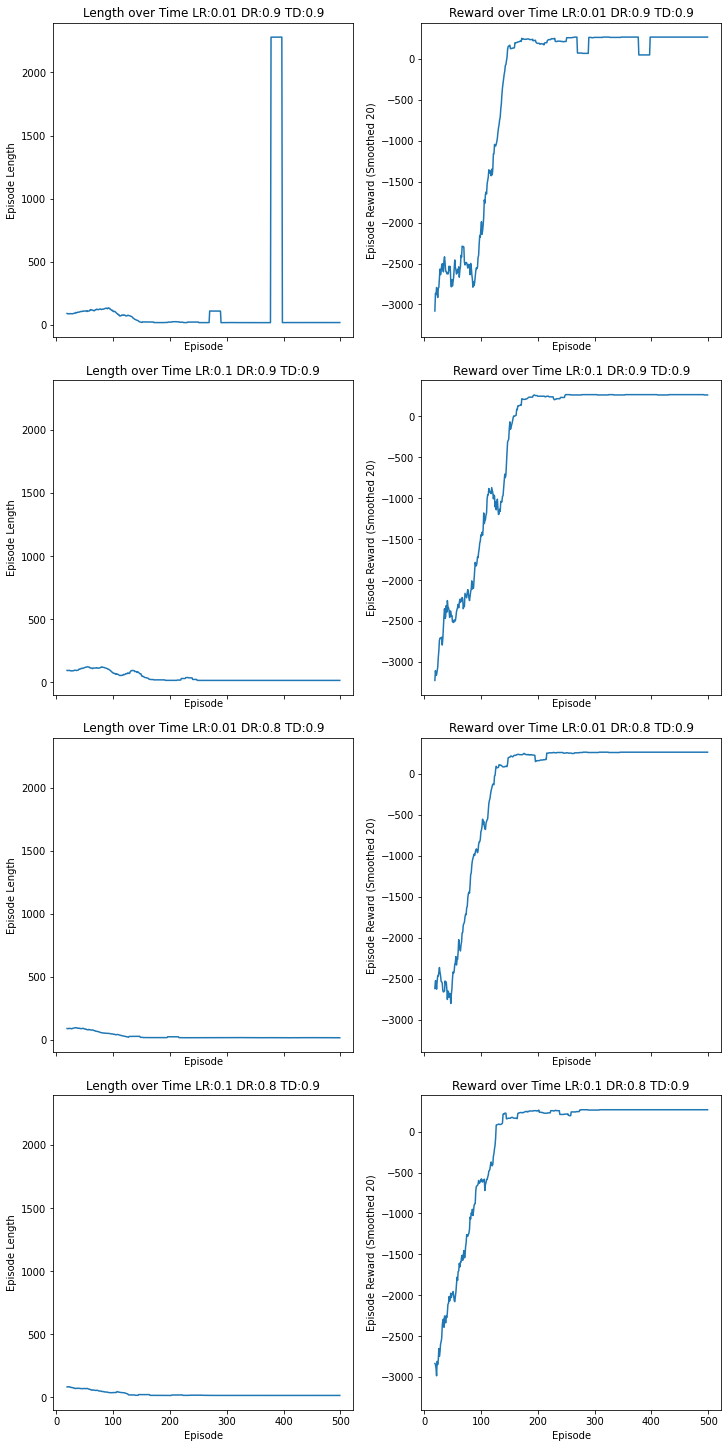

In [10]:
t0 = time.monotonic()
fig, axs = plt.subplots(total_runs, num_plots, figsize=(10, 5*total_runs), constrained_layout=True, sharex=True, sharey='col')
for i, discount_rate in enumerate(discount_rates):
    for j, learning_rate in enumerate(learning_rates):
        metric = algorithms.run_single_estimator('sarsa', env, env.observation_space.n, env.action_space.n, episodes=episodes,
                               learning_rate=learning_rate, discount_rate=discount_rate)
        ax_row = i * len(learning_rates) + j
        plot_episode_length_over_time_tabular(axs[ax_row, 0], metric, smoothing_window=20)
        plot_episode_reward_over_time_tabular(axs[ax_row, 1], metric, smoothing_window=20)


print(f'Time until plots are ready: {time.monotonic()-t0}')
plt.show()
